<h1>Color gradient</h1>

Natural images are not to grayscale, the colors usually retain the properties of symmetry the objects do. It is necessary to be able to randomly generate gradients of color to be applied into different elements of the figure.

[Tutorial](https://note.nkmk.me/en/python-numpy-generate-gradation-image/)

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Utils.functions import createAnySymmetry,getSmoothNoiseSin

<h3>Random Gradient</h3>

The function `get_gradient_line` will return a one dimensional gradient that will be expanded with the function `get_gradient`. This function returns an array with a 2 dimensional array.

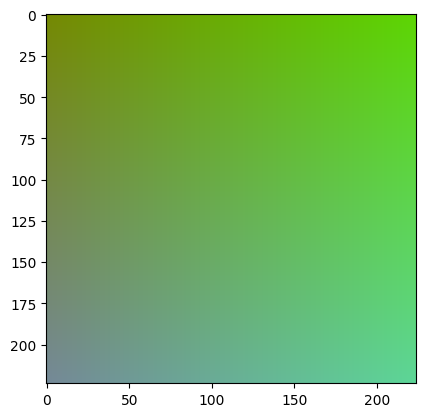

In [3]:
def get_gradient_line(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

def get_gradient(width, height, start_list = None, stop_list = None, is_horizontal_list = None):
    if start_list is None:
        start_list = (random.randrange(255), random.randrange(255), random.randrange(255))
    if stop_list is None:
        stop_list = (random.randrange(255), random.randrange(255), random.randrange(255))
    if is_horizontal_list is None:
        is_horizontal_list = (random.getrandbits(1), random.getrandbits(1), random.getrandbits(1))
    result = np.zeros((height, width, len(start_list)), dtype=np.uint8)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_line(start, stop, width, height, is_horizontal)

    return result

grad = get_gradient(224,224)
plt.imshow(grad)
plt.show()

<h3>Applying gradient to elements</h3>

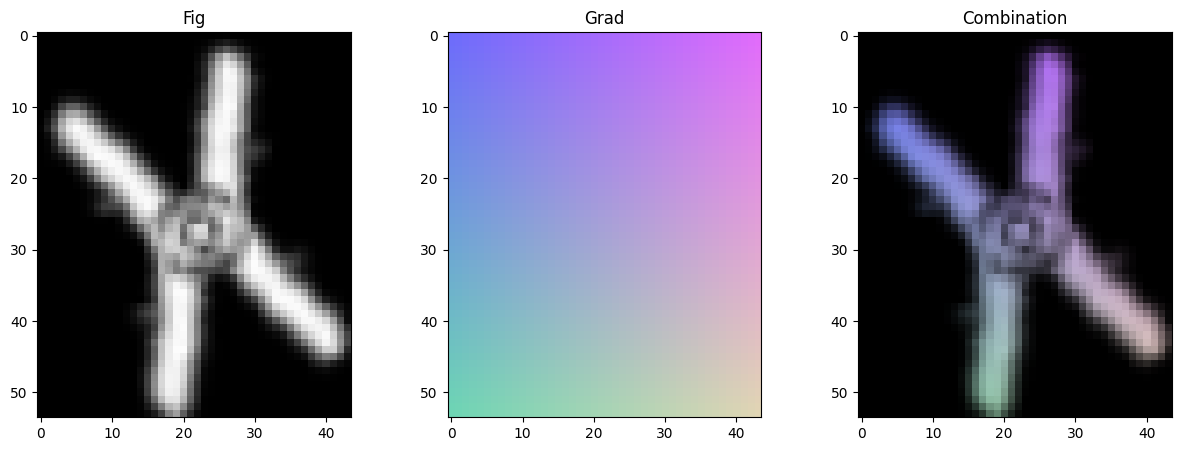

In [4]:
# Reading the database
mnist = pd.read_csv('MNIST/mnist_test.csv')

img, _ = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5], color = False)
grad = get_gradient(img.shape[1],img.shape[0])
norm = grad/255
comb = np.multiply(img,norm)
comb = comb.astype(np.uint8)

_, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'Fig')
ax[1].imshow(grad), ax[1].set_title(f'Grad')
ax[2].imshow(comb), ax[2].set_title(f'Combination')
plt.show()

<h3>Putting everything together</h3>

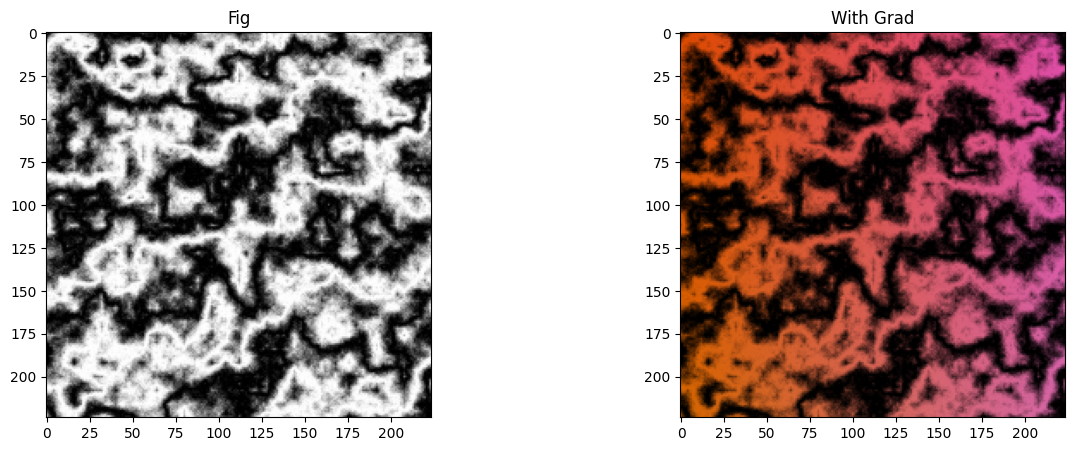

In [7]:
# Applies random color gradient to given image
def applyColorGradient(image, start=None, end=None, axes=None):
    grad = get_gradient(image.shape[1],image.shape[0], start_list=start, stop_list=end, is_horizontal_list=axes)
    norm = grad/255
    image = np.multiply(image,norm)
    image = image.astype(np.uint8)

    return image

back,_ = getSmoothNoiseSin((224,224,3), darkness=1)
disp = back.copy()
disp = applyColorGradient(disp)

_, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].imshow(back), ax[0].set_title(f'Fig')
ax[1].imshow(disp), ax[1].set_title(f'With Grad')
plt.show()

<h3>Repliclable Color Gradients</h3>

There are multiple instances where its necessary for the code to be able to replicate gradients into other figures. For this the function `applyReplicableColorGradient` saves a token of the gradient for it to be replicated into other examples.

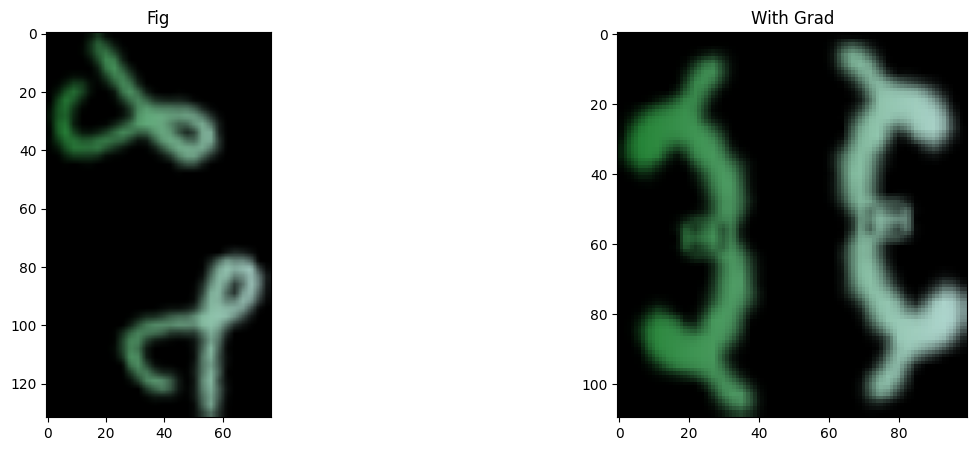

In [13]:
# Applies a repliclable random color gradient to given image, input the return tuple to replicate the gradient in another object
def applyReplicableColorGradient(image, replicate = None):
    if replicate is None:
        replicate = {
            'start' : (random.randrange(255), random.randrange(255), random.randrange(255)),
            'end'   : (random.randrange(255), random.randrange(255), random.randrange(255)),
            'axes'  : (random.getrandbits(1), random.getrandbits(1), random.getrandbits(1))
        }
    image = applyColorGradient(image, start=replicate['start'], end=replicate['end'], axes=replicate['axes'])

    return image, replicate

img1, _ = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5], color = False)
img1, replicate = applyReplicableColorGradient(img1)
img2, _ = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5], color = False)
img2, _ = applyReplicableColorGradient(img2, replicate=replicate)

_, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].imshow(img1), ax[0].set_title(f'Fig')
ax[1].imshow(img2), ax[1].set_title(f'With Grad')
plt.show()
